# 0. Project specific imports

In [37]:
import dyn.dyn.datasets.experimental as experimental
import dyn.dyn.datasets.synthetic as synthetic
import dyn.dyn.features.f_fit_functions as qfit
import dyn.dyn.features.optimize_am as optimize_am
import dyn.dyn.features.basic as basic
import dyn.dyn.viz as viz
import numpy as np
import matplotlib.pyplot as plt


viz.init_matplotlib()

# 1. Now, attempt to create and plot a synthetic trajectory between two cells.

## 1.1 Load Osteosarcoma cells

In [5]:
n_cells = 650
n_sampling_points = 100

quotient = ["scaling", "rotation"]

cells, cell_shapes, labels_a, labels_b = experimental.load_treated_osteosarcoma_cells(
        n_cells=n_cells, n_sampling_points=n_sampling_points, quotient=quotient
    )

... Selecting only a random subset of 650 / 650 cells.
... Interpolating: Cell boundaries have 100 samplings points.
... Removing potential duplicate sampling points on cell boundaries.

- Cells: quotienting translation.
- Cell shapes: quotienting scaling (length).
- Cell shapes: quotienting rotation.


In [109]:
import importlib
importlib.reload(synthetic)

# cell_1 = cell_shapes[0]
# cell_2 = cell_shapes[12]

# cell_1 = cell_shapes[0]
# cell_2 = cell_shapes[10]

cell_1 = cell_shapes[0]
cell_2 = cell_shapes[15]


a= 1
b=0.5
n_times = 5
n_points=40

trajectory = synthetic.trajectory_between_curves(cell_1, cell_2, a, b, n_times, n_points)

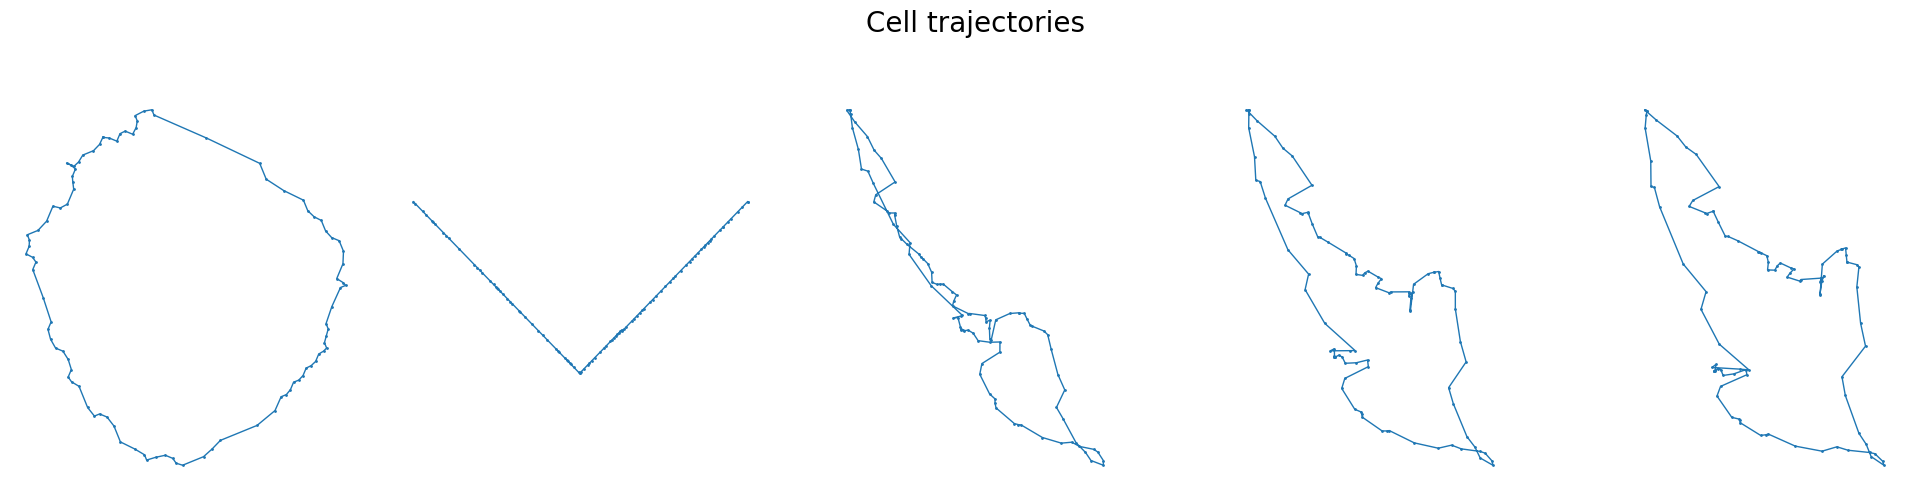

In [110]:
n_traj = 1

fig, axes = plt.subplots(
    n_traj, n_times, figsize=(20, 5), #sharex=True, sharey=True
)

for i_time in range(n_times):
    axes[i_time].plot(
        trajectory[i_time][:, 0], trajectory[i_time][:, 1], 
        marker="o", markersize=1, linewidth=1
    )
    axes[i_time].axis('scaled')
    axes[i_time].axis("off")
#     axes[i_time].set_aspect("equal")

fig.suptitle("Cell trajectories", fontsize=20, y=1.0)
plt.tight_layout()